In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving arquivo_treino.csv to arquivo_treino.csv
User uploaded file "arquivo_treino.csv" with length 5006082 bytes


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving arquivo_teste.csv to arquivo_teste.csv
User uploaded file "arquivo_teste.csv" with length 5394752 bytes


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
df1 = pd.read_csv('arquivo_treino.csv', sep=',')
del df1['Unnamed: 0']
df1.head(3)

,ultimo_salario_candidato,nivel_candidato,formacao_candidato,nivel_ingles_candidato,nivel_espanhol_candidato,mediana_teste_ingles_candidato,mediana_teste_espanhol_candidato,mediana_teste_logica_candidato,mediana_teste_outros_candidato,cargo_vaga,aprovado_vaga
0,0.706283,-0.613524,-0.675902,-0.714495,-0.669559,-0.679300,-0.569908,-0.655806,-0.674119,-0.571804,0.0
1,0.707600,-0.633856,-0.685975,-0.682542,-0.639393,-0.665927,-0.570999,-0.686879,-0.679105,-0.572923,0.0
2,0.710179,-0.620538,-0.684306,-0.679271,-0.645696,-0.659470,-0.573473,-0.674894,-0.701256,-0.575809,0.0


In [ ]:
df2 = pd.read_csv('arquivo_teste.csv', sep=',')
del df2['Unnamed: 0']
df2.head(3)

,ultimo_salario_candidato,nivel_candidato,formacao_candidato,nivel_ingles_candidato,nivel_espanhol_candidato,mediana_teste_ingles_candidato,mediana_teste_espanhol_candidato,mediana_teste_logica_candidato,mediana_teste_outros_candidato,cargo_vaga
0,0.790191,-0.492593,-0.696916,-0.452506,-0.316476,-0.458058,-0.182517,-0.468503,-0.521795,-0.301039
1,-1.266055,1.244005,0.407282,1.952312,-0.336973,2.318139,-0.182517,1.908075,1.582542,-0.301039
2,-1.266055,-0.080898,0.406763,1.708576,0.993823,2.243478,3.819071,1.603225,1.886391,-0.301039


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras

In [ ]:
from sklearn.model_selection import train_test_split

y = df1['aprovado_vaga']
X = df1.drop('aprovado_vaga',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size=0.20)

In [ ]:
classificador = Sequential()
classificador.add(Dense(units = 16, activation = 'relu', 
                        kernel_initializer = 'random_uniform', input_dim = 10))
classificador.add(Dense(units = 16, activation = 'relu', 
                        kernel_initializer = 'random_uniform'))
classificador.add(Dense(units = 1, activation = 'sigmoid'))



In [ ]:
otimizador = keras.optimizers.Adam(lr = 0.001, decay = 0.0001, clipvalue = 0.5)
classificador.compile(optimizer = otimizador, loss = 'binary_crossentropy',
                      metrics = ['binary_accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
%%time
classificador.fit(X_train,y_train, batch_size = 10, epochs = 100)


Epoch 1/100
1955/1955 [==============================] - 4s 2ms/step - loss: 0.3177 - binary_accuracy: 0.9060
Epoch 2/100
1955/1955 [==============================] - 3s 2ms/step - loss: 0.3041 - binary_accuracy: 0.9062
Epoch 3/100
1955/1955 [==============================] - 3s 2ms/step - loss: 0.3036 - binary_accuracy: 0.9062
Epoch 4/100
1955/1955 [==============================] - 3s 2ms/step - loss: 0.3037 - binary_accuracy: 0.9062
Epoch 5/100
1955/1955 [==============================] - 3s 2ms/step - loss: 0.3036 - binary_accuracy: 0.9062
Epoch 6/100
1955/1955 [==============================] - 3s 2ms/step - loss: 0.3033 - binary_accuracy: 0.9062
Epoch 7/100
1955/1955 [==============================] - 3s 2ms/step - loss: 0.3029 - binary_accuracy: 0.9062
Epoch 8/100
1955/1955 [==============================] - 3s 2ms/step - loss: 0.3031 - binary_accuracy: 0.9062
Epoch 9/100
1955/1955 [==============================] - 3s 2ms/step - loss: 0.3030 - binary_accuracy: 0.9062
Epoch 10/1

In [ ]:
pesos0 = classificador.layers[0].get_weights()
print(pesos0)
print(len(pesos0))

[array([[ 6.47568330e-02,  1.20822918e-02,  4.01584338e-03,
         9.44001600e-02,  1.28185540e-01,  8.70973095e-02,
         1.28477797e-01,  8.68291482e-02,  6.93140626e-02,
         1.70758680e-01,  4.99535613e-02,  2.26666197e-01,
         1.09848037e-01,  8.37488007e-03,  1.81432158e-01,
         1.59274146e-01],
       [ 3.40041108e-02,  3.96602042e-02,  5.92170469e-02,
         3.44547406e-02,  1.40232384e-01,  1.12857437e-02,
         1.31798774e-01,  6.44424185e-02,  3.62776592e-02,
        -5.59614412e-02, -8.60548392e-02, -7.49792233e-02,
         3.47450413e-02,  5.53570278e-02, -4.43681665e-02,
        -2.53399946e-02],
       [ 1.80914789e-01,  1.99162379e-01,  2.00716332e-01,
         1.52795479e-01,  4.14443873e-02,  9.66441333e-02,
         9.29071829e-02,  2.71088537e-02,  2.26807103e-01,
         2.33225077e-02,  1.91572532e-01, -1.14181921e-01,
         1.21307306e-01,  1.56109571e-01, -3.59638520e-02,
        -6.36730939e-02],
       [ 1.74275830e-01,  1.79193512

In [ ]:
pesos1 = classificador.layers[1].get_weights()
pesos2 = classificador.layers[2].get_weights()

In [ ]:
previsoes = classificador.predict(X_test)
previsoes = (previsoes > 0.20)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
precisao = accuracy_score(y_test, previsoes)
matriz = confusion_matrix(y_test, previsoes)
precision_score = precision_score(y_test, previsoes)
recall = recall_score(y_test, previsoes)
f1 = f1_score(y_test, previsoes)

print('Nova Acuracia: {:.4f}'.format(Acuracia))
print('Nova precisão: {:.4f}'.format(precision_score))
print('Nova recall: {:.4f}'.format(recall))
print('Nova F1 Score: {:.4f}'.format(f1))
print('\n')
print(matriz)


Nova Acuracia: 0.8459
Nova precisão: 0.2692
Nova recall: 0.1233
Nova F1 Score: 0.1692


[[4281  152]
 [ 398   56]]


O principal motivo pela escolha em utilizar o 0,20 é o fato da matriz de confusão ter dado o melhor retorno, com base nas variáveis. Apesar de que a pontuação 0,11 obteria o melhor F1-Score, porém o número de erros na matriz de confusao iria aumentar muito. 

In [ ]:
resultado = classificador.evaluate(X_test, y_test)
resultado

153/153 [==============================] - 0s 1ms/step - loss: 0.2986 - binary_accuracy: 0.9071


[0.29861220717430115, 0.9071004986763]

In [ ]:
#Lidando com classes desbalanceadas
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

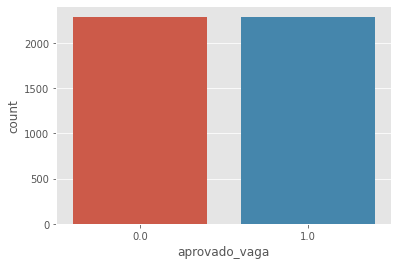

In [ ]:
nr = NearMiss()

X, y = nr.fit_resample(X, y)

ax = sns.countplot(x=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y, random_state=2)

In [ ]:
classificador1 = Sequential()
classificador1.add(Dense(units = 16, activation = 'relu', 
                        kernel_initializer = 'random_uniform', input_dim = 10))
classificador1.add(Dense(units = 16, activation = 'relu', 
                        kernel_initializer = 'random_uniform'))
classificador1.add(Dense(units = 1, activation = 'sigmoid'))

otimizador = keras.optimizers.Adam(lr = 0.001, decay = 0.0001, clipvalue = 0.5)
classificador1.compile(optimizer = otimizador, loss = 'binary_crossentropy',
                      metrics = ['binary_accuracy'])



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
%%time
classificador1.fit(X_train,y_train, batch_size = 10, epochs = 250)

Epoch 1/250
366/366 [==============================] - 1s 2ms/step - loss: 0.6062 - binary_accuracy: 0.6226
Epoch 2/250
366/366 [==============================] - 1s 2ms/step - loss: 0.5515 - binary_accuracy: 0.6592
Epoch 3/250
366/366 [==============================] - 1s 2ms/step - loss: 0.5415 - binary_accuracy: 0.6753
Epoch 4/250
366/366 [==============================] - 1s 2ms/step - loss: 0.5322 - binary_accuracy: 0.6890
Epoch 5/250
366/366 [==============================] - 1s 2ms/step - loss: 0.5231 - binary_accuracy: 0.6991
Epoch 6/250
366/366 [==============================] - 1s 2ms/step - loss: 0.5146 - binary_accuracy: 0.7152
Epoch 7/250
366/366 [==============================] - 1s 2ms/step - loss: 0.5087 - binary_accuracy: 0.7237
Epoch 8/250
366/366 [==============================] - 1s 2ms/step - loss: 0.5034 - binary_accuracy: 0.7248
Epoch 9/250
366/366 [==============================] - 1s 2ms/step - loss: 0.4990 - binary_accuracy: 0.7300
Epoch 10/250
366/366 [======

In [ ]:
pesos0 = classificador1.layers[0].get_weights()
print(pesos0)
print(len(pesos0))
pesos1 = classificador1.layers[1].get_weights()
pesos2 = classificador1.layers[2].get_weights()


[array([[-3.42598826e-01,  1.05805723e-02,  1.46869302e-01,
         2.17400745e-01, -2.05206752e-01,  3.94873351e-01,
         5.97377196e-02, -1.87381655e-01,  1.06920585e-01,
         2.81538665e-01,  1.66130275e-01,  1.40596762e-01,
        -3.41018051e-01,  5.72423227e-02,  6.95656165e-02,
         1.57576799e-01],
       [ 4.84301969e-02,  7.18728602e-01,  4.39352822e-03,
         3.75458956e-01, -1.11324646e-01, -2.08039954e-01,
         1.40729286e-02, -6.51616976e-02, -2.18655150e-02,
        -1.10560402e-01,  1.43756901e-04,  4.86796424e-02,
         4.89318036e-02,  4.80655255e-03, -1.88068803e-02,
        -2.33563751e-01],
       [-1.05487462e-02,  1.79537013e-02,  8.86902511e-02,
         5.37352031e-03, -5.71348704e-02, -1.45702168e-01,
        -7.55089819e-02, -3.35355662e-02,  3.54298539e-02,
        -8.16168189e-02,  8.95851403e-02, -1.19046941e-01,
         1.00940429e-01, -1.48999006e-01,  5.24334684e-02,
        -1.54007673e-01],
       [-1.05169766e-01, -3.05388689

In [ ]:
previsoes1 = classificador1.predict(X_test)
previsoes1 = (previsoes1 > 0.36)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
Acuracia = accuracy_score(y_test, previsoes1)
matriz = confusion_matrix(y_test, previsoes1)
precision_score = precision_score(y_test, previsoes1)
recall = recall_score(y_test, previsoes1)
f1 = f1_score(y_test, previsoes1)

print('Nova Acuracia: {:.4f}'.format(Acuracia))
print('Nova precisão: {:.4f}'.format(precision_score))
print('Nova recall: {:.4f}'.format(recall))
print('Nova F1 Score: {:.4f}'.format(f1))
print('\n')
print(matriz)


Nova Acuracia: 0.8262
Nova precisão: 0.8341
Nova recall: 0.8140
Nova F1 Score: 0.8239


[[384  74]
 [ 85 372]]


In [ ]:
resultado1 = classificador1.evaluate(X_test, y_test)
resultado1

29/29 [==============================] - 0s 1ms/step - loss: 0.3784 - binary_accuracy: 0.8350


[0.3783707618713379, 0.8349726796150208]

In [ ]:
sub = classificador1.predict(df2)


In [ ]:
submission['aprovado_vaga'] = pd.DataFrame(sub)

In [ ]:
submission['aprovado_vaga'].value_counts()

1.000000    23025
0.099474      607
0.036465      282
0.038940      276
0.058834      245
            ...  
0.995530        1
0.995628        1
0.921639        1
0.163008        1
0.896885        1
Name: aprovado_vaga, Length: 484, dtype: int64

In [ ]:
def classificacao(s):
  if s >= 0.5:
    return 'aprovado'
  elif s < 0.5:
    return 'não aprovado'


In [ ]:
submission['classificação'] = submission['aprovado_vaga'].apply(classificacao)
submission['classificação'].value_counts()

aprovado        24335
não aprovado     1799
Name: classificação, dtype: int64